# Urbanization Clustering Analysis using k-NN
---
### Background
This notebook explores the similarity between cities based on urban features using **k-Nearest Neighbors (k-NN)**. We employ Euclidean distance to compare cities and uncover potential clusters in urbanization behavior.

### Data
The dataset includes various urban metrics such as population density, energy consumption, air quality index, and urban greenness ratio. It is loaded from `urban_heat_island_dataset.csv`.

### Advantages
- Simple, intuitive distance-based clustering
- No assumption of underlying data distribution
- Effective in identifying local patterns

### Disadvantages
- Sensitive to feature scaling
- Choice of `k` may influence results
- Distance metrics may not reflect real-world proximity in all cases

### Function
This notebook:
- Scales urban metric data
- Fits a k-NN model to compute distances
- Visualizes urban clusters with different plots


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

In [110]:
df = pd.read_csv("urban_heat_island_dataset.csv")

# select relevant attributes for k-NN analysis ****************
features = ['Population Density (people/km²)', 'Energy Consumption (kWh)', 
            'Air Quality Index (AQI)', 'Urban Greenness Ratio (%)']
df_selected = df[features]

# normalize data for consistent distance measurements
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

In [111]:
# k-NN model
knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(df_scaled)
distances, indices = knn.kneighbors(df_scaled)

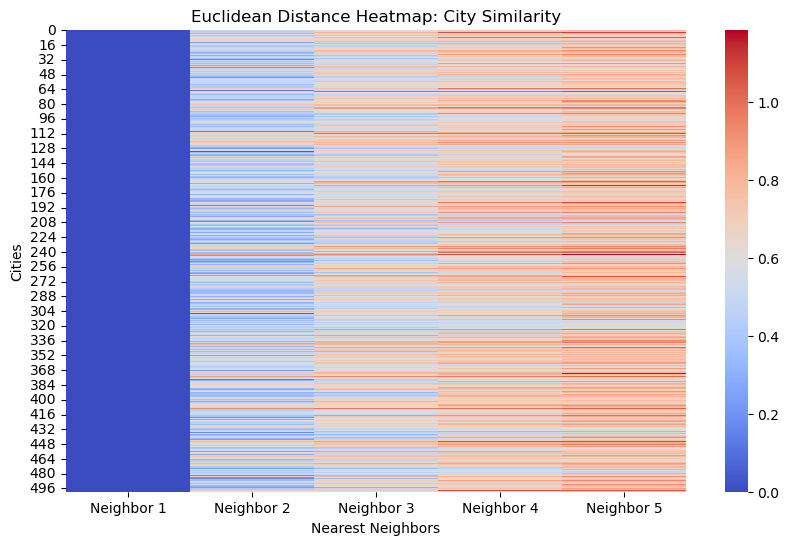

In [112]:
# Pairwise Euclidean Distance Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pd.DataFrame(distances, columns=[f'Neighbor {i+1}' for i in range(5)]), cmap='coolwarm')
plt.title("Euclidean Distance Heatmap: City Similarity")
plt.xlabel("Nearest Neighbors")
plt.ylabel("Cities")
plt.show()
# depicts how there are less similarities (map becomes more red) as you go to the next nearest neighbor 

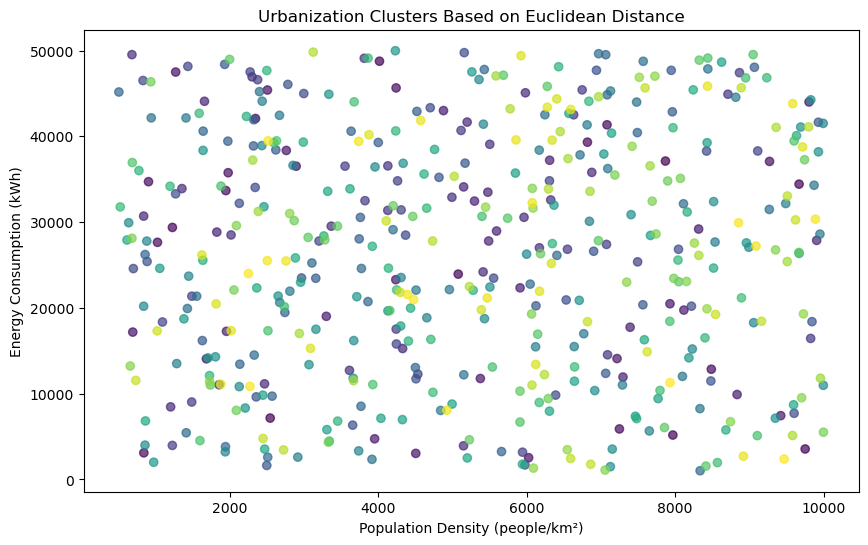

In [113]:
# Clustering cities based on distance
plt.figure(figsize=(10,6))
plt.scatter(df['Population Density (people/km²)'], df['Energy Consumption (kWh)'], 
            c=indices[:,0], cmap='viridis', alpha=0.7)
plt.xlabel("Population Density (people/km²)")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Urbanization Clusters Based on Euclidean Distance")
plt.show()
# each color represents a different cluster, and we can see that they are relatively spaced out, for these 2 metrics at least. 
# graphing different features or using a different distance metric might reveal patterns. 

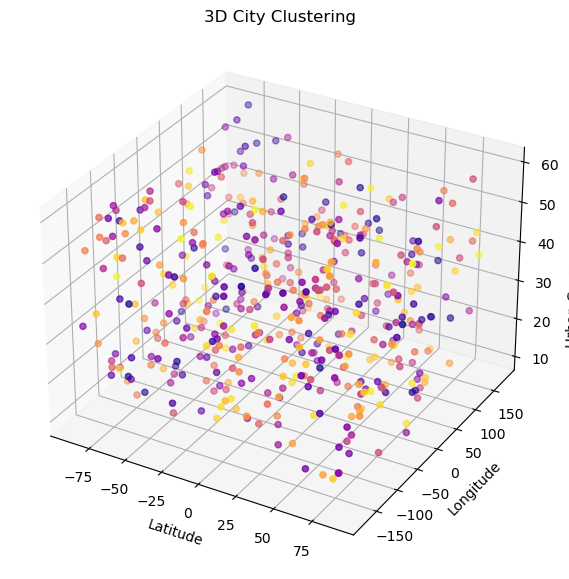

In [114]:
# 3D Plot of City Clusters
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Latitude'], df['Longitude'], df['Urban Greenness Ratio (%)'], 
           c=indices[:,0], cmap='plasma')
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Urban Greenness Ratio (%)")
ax.set_title("3D City Clustering")
plt.show()
# we attempt to find a correlation between global location, and urban greenness ratio, but it is once again difficult to identify a clear trend. 
# this could tell us that urban greenness is not so dependent on latitude and longitude alone, but might rely on other factors. 

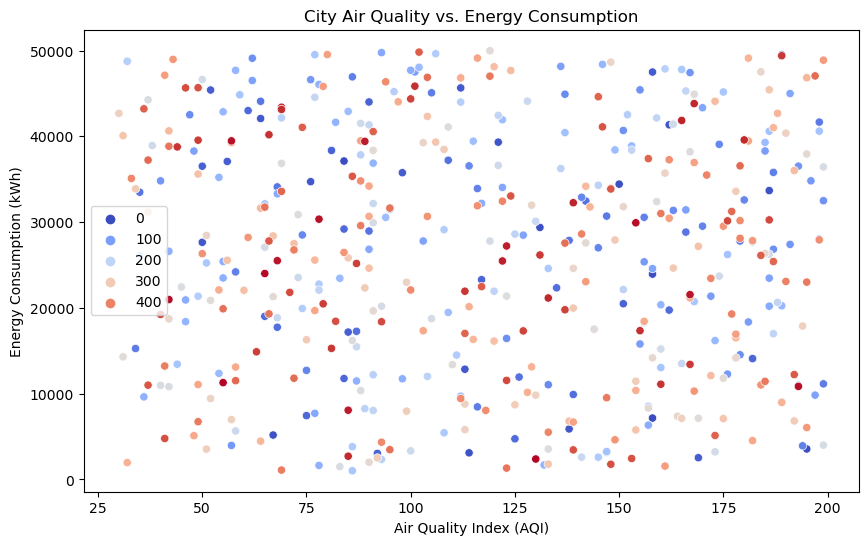

In [115]:
# Air Quality vs. Energy Consumption
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Air Quality Index (AQI)'], y=df['Energy Consumption (kWh)'], hue=indices[:,0], palette='coolwarm')
plt.title("City Air Quality vs. Energy Consumption")
plt.xlabel("Air Quality Index (AQI)")
plt.ylabel("Energy Consumption (kWh)")
plt.show()
# once again, it is hard to identify a clear correlation from this graph alone. 
# there does seem to be a vertical line before x = 100, which may suggest that AQI is manipulated to be below this threshold. 

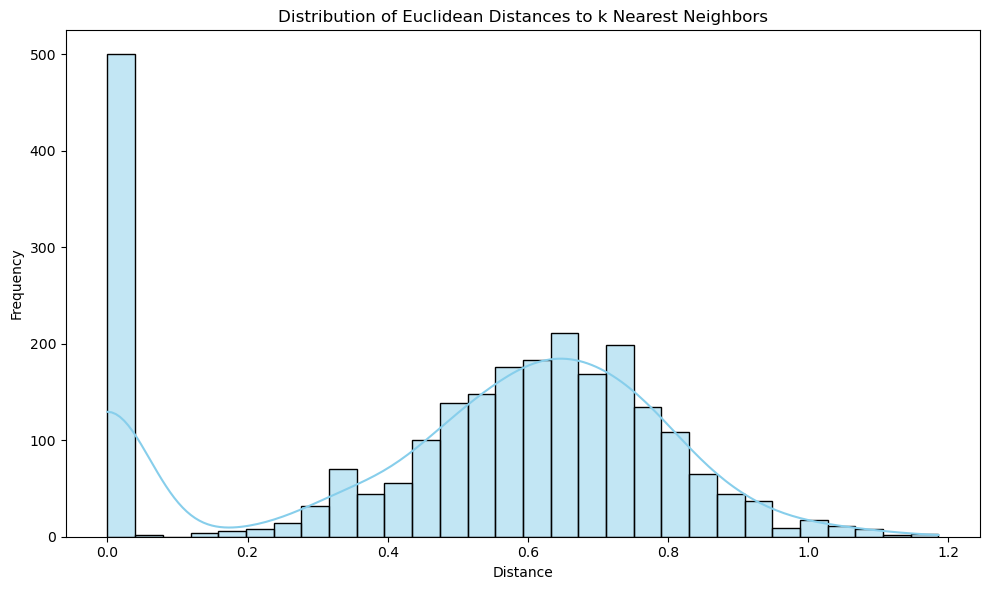

In [116]:
# distance distribution plot across all k-NN distances
flattened_distances = distances.flatten()

# plot histogram of neighbor distances
plt.figure(figsize=(10, 6))
sns.histplot(flattened_distances, bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribution of Euclidean Distances to k Nearest Neighbors")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


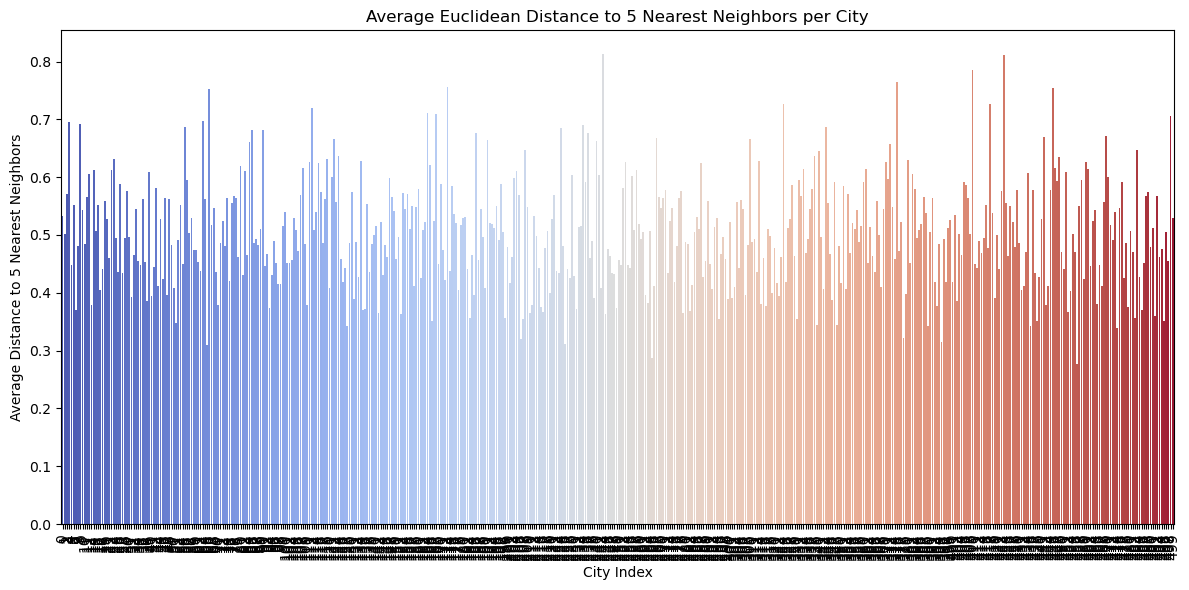

In [117]:
# calculate mean distance to nearest neighbors for each city
avg_distances = distances.mean(axis=1)

# plot average distance per city
plt.figure(figsize=(12, 6))
sns.barplot(x=np.arange(len(avg_distances)), y=avg_distances, palette="coolwarm")
plt.xlabel("City Index")
plt.ylabel("Average Distance to 5 Nearest Neighbors")
plt.title("Average Euclidean Distance to 5 Nearest Neighbors per City")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


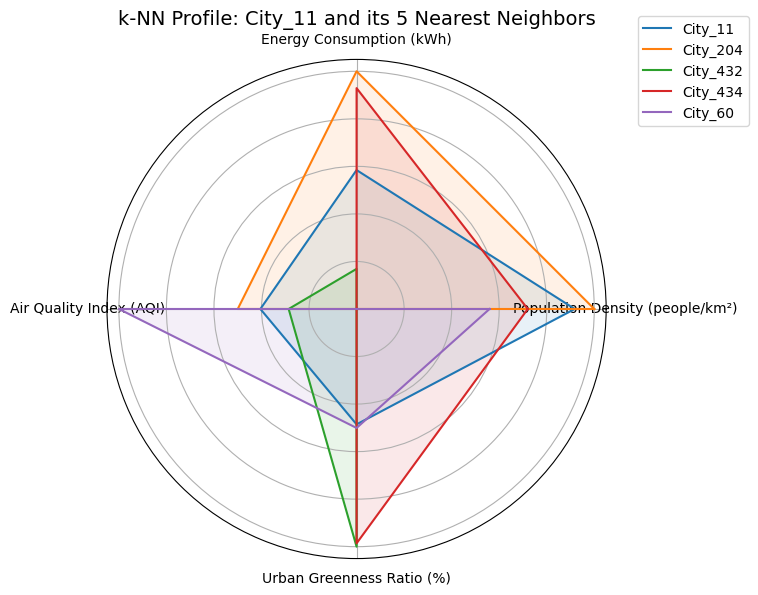

In [118]:
# pick one city to examine its neighbors
city_index = 10  # arbitrary city index
neighbor_indices = indices[city_index]
neighbor_distances = distances[city_index]

city_name = df.iloc[city_index]["City Name"]
neighbors = df.iloc[neighbor_indices][["City Name"] + features]

import matplotlib.pyplot as plt
import numpy as np

def normalize_for_radar(data):
    return (data - data.min()) / (data.max() - data.min())

data_radar = normalize_for_radar(neighbors[features])
labels = features
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # repeat first angle to close the loop

# start plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# plot each city's line
for i, row in data_radar.iterrows():
    values = row.tolist()
    values += values[:1]
    label = df.iloc[i]["City Name"]
    ax.plot(angles, values, label=label)
    ax.fill(angles, values, alpha=0.1)

# formatting
ax.set_title(f"k-NN Profile: {city_name} and its 5 Nearest Neighbors", size=14)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticklabels([])
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


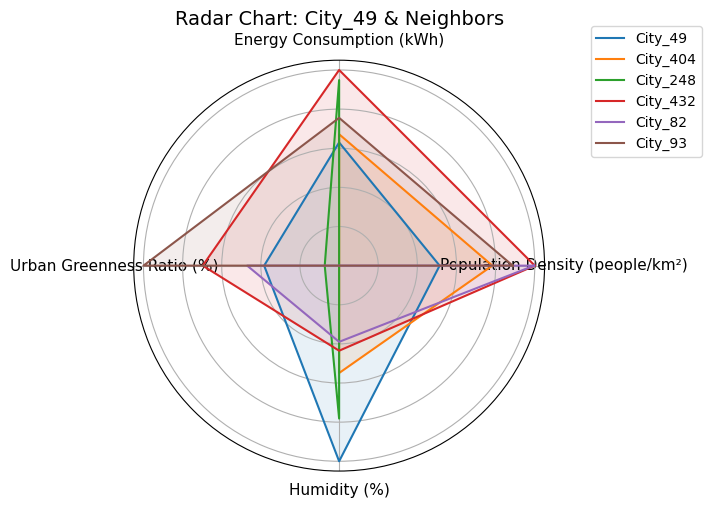

In [119]:
city_index = 48
features_1 = ['Population Density (people/km²)', 'Energy Consumption (kWh)', 
              'Urban Greenness Ratio (%)', 'Humidity (%)']

scaler = StandardScaler()
X = scaler.fit_transform(df[features_1])
knn = NearestNeighbors(n_neighbors=6)
distances, indices = knn.fit(X).kneighbors(X)

neighbor_indices = indices[city_index][1:]
neighbors = df.iloc[neighbor_indices][features_1]
target_city = df.iloc[[city_index]][features_1]
data = pd.concat([target_city, neighbors], axis=0)

data_norm = (data - data.min()) / (data.max() - data.min())
labels = features_1
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i, row in data_norm.iterrows():
    values = row.tolist() + [row.tolist()[0]]
    label = df.iloc[i]["City Name"]
    ax.plot(angles, values, label=label)
    ax.fill(angles, values, alpha=0.1)
ax.set_title(f"Radar Chart: {df.iloc[city_index]['City Name']} & Neighbors", size=14)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=11)
ax.set_yticklabels([])
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1.1))
plt.tight_layout()
plt.show()


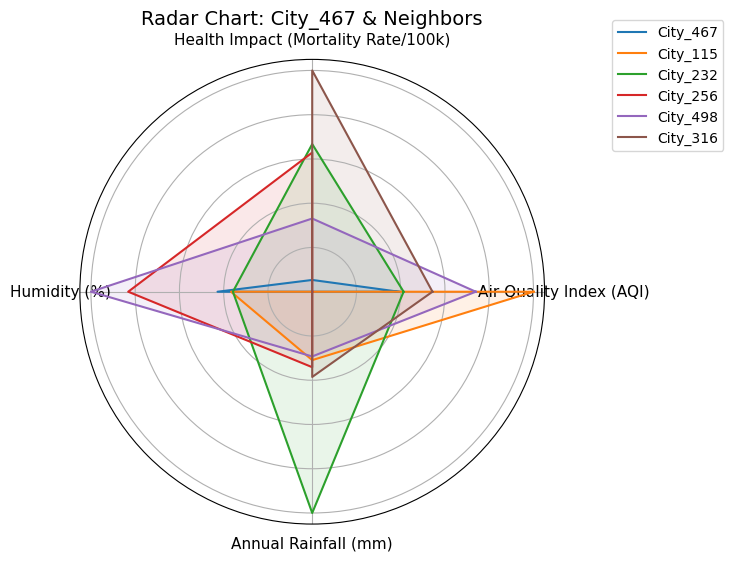

In [120]:
city_index = 466
features_2 = ['Air Quality Index (AQI)', 'Health Impact (Mortality Rate/100k)', 
              'Humidity (%)', 'Annual Rainfall (mm)']

scaler = StandardScaler()
X = scaler.fit_transform(df[features_2])
knn = NearestNeighbors(n_neighbors=6)
distances, indices = knn.fit(X).kneighbors(X)

neighbor_indices = indices[city_index][1:]
neighbors = df.iloc[neighbor_indices][features_2]
target_city = df.iloc[[city_index]][features_2]
data = pd.concat([target_city, neighbors], axis=0)

data_norm = (data - data.min()) / (data.max() - data.min())
labels = features_2
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i, row in data_norm.iterrows():
    values = row.tolist() + [row.tolist()[0]]
    label = df.iloc[i]["City Name"]
    ax.plot(angles, values, label=label)
    ax.fill(angles, values, alpha=0.1)
ax.set_title(f"Radar Chart: {df.iloc[city_index]['City Name']} & Neighbors", size=14)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=11)
ax.set_yticklabels([])
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1.1))
plt.tight_layout()
plt.show()


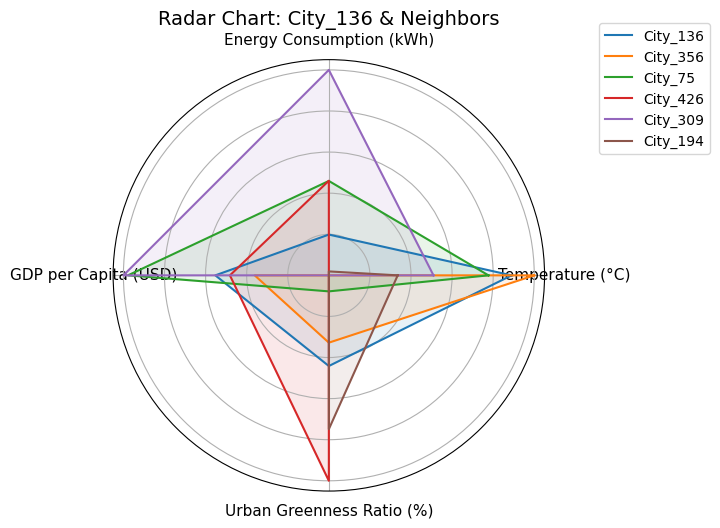

In [121]:
city_index = 135
features_3 = ['Temperature (°C)', 'Energy Consumption (kWh)', 
              'GDP per Capita (USD)', 'Urban Greenness Ratio (%)']

scaler = StandardScaler()
X = scaler.fit_transform(df[features_3])
knn = NearestNeighbors(n_neighbors=6)
distances, indices = knn.fit(X).kneighbors(X)

neighbor_indices = indices[city_index][1:]
neighbors = df.iloc[neighbor_indices][features_3]
target_city = df.iloc[[city_index]][features_3]
data = pd.concat([target_city, neighbors], axis=0)

data_norm = (data - data.min()) / (data.max() - data.min())
labels = features_3
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i, row in data_norm.iterrows():
    values = row.tolist() + [row.tolist()[0]]
    label = df.iloc[i]["City Name"]
    ax.plot(angles, values, label=label)
    ax.fill(angles, values, alpha=0.1)
ax.set_title(f"Radar Chart: {df.iloc[city_index]['City Name']} & Neighbors", size=14)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=11)
ax.set_yticklabels([])
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1.1))
plt.tight_layout()
plt.show()


# Results
---
Through various visualizations, we explored this dataset using k-NN and tried to find meaningful groupings of cities based on their urban metrics.
- **Heatmap** illustrates how close cities are in feature space.
- **Scatter plots** shows relationships among urban indicators and how they cluster.
- **3D visualization** demonstrates how geography and greenery intertwine in clustering.
- **Histogram** shows distribution of Euclidean distances.
- **Radar charts** visually depict the overlap of different features.

### Conclusion
k-NN provides a simple but powerful tool for clustering cities and analyzing urbanization patterns. With proper scaling and feature selection, it can assist in policy-making and urban planning decisions.
